<a href="https://colab.research.google.com/github/ANSHBHARDWAJ22/denoise_mnist/blob/main/denoise_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize data to range [0, 1] and flatten
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [ ]:
# Clip the values to ensure they stay within [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Flatten the images for the autoencoder
x_train_flat = x_train_noisy.reshape(-1, 28 * 28)
x_test_flat = x_test_noisy.reshape(-1, 28 * 28)

In [ ]:
# Define the autoencoder using Functional API
input_img = Input(shape=(28 * 28,))  # Input layer

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Latent space representation
latent = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
output_img = Dense(28 * 28, activation='sigmoid')(decoded)  # Output layer

In [ ]:
# Autoencoder model
autoencoder = Model(input_img, output_img)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(
    x_train_flat, x_train.reshape(-1, 28 * 28),
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test.reshape(-1, 28 * 28))
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3402 - val_loss: 0.2089
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1971 - val_loss: 0.1722
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1681 - val_loss: 0.1577
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1555 - val_loss: 0.1500
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1489 - val_loss: 0.1437
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1440 - val_loss: 0.1408
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1404 - val_loss: 0.1380
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1382 - val_loss: 0.1368
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1359 - val_loss: 0.1343
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1342 - val_loss: 0.1333
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1322 - val_loss: 0.1307
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate the model on test data
decoded_imgs = autoencoder.predict(x_test_flat)

# Reshape the results to the original image shape
decoded_imgs = decoded_imgs.reshape(-1, 28, 28)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Display some examples of noisy and denoised images
def display_images(original, noisy, denoised, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Noisy image
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(noisy[i], cmap='gray')
        plt.title("Noisy")
        plt.axis("off")

        # Denoised image
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(denoised[i], cmap='gray')
        plt.title("Denoised")
        plt.axis("off")
    plt.show()



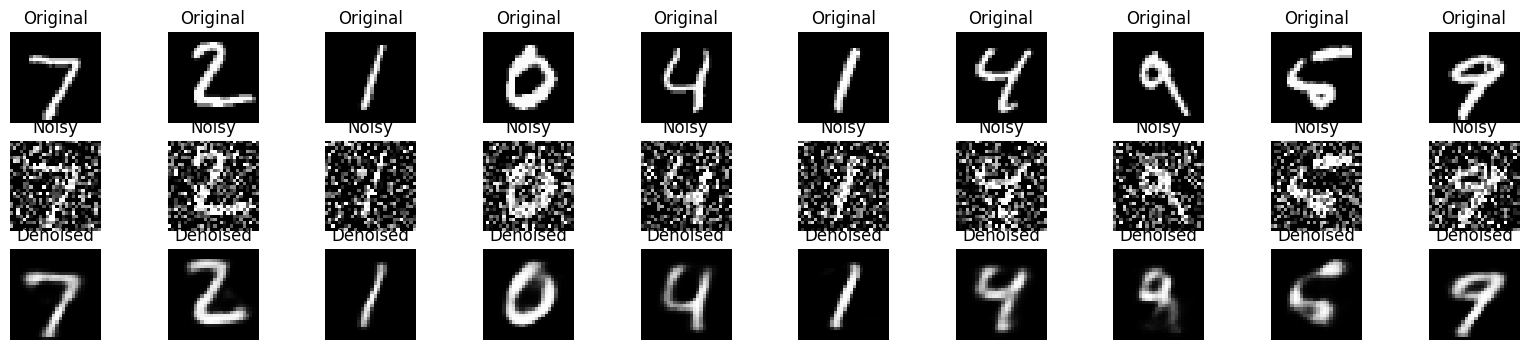

In [ ]:
# Display the images
display_images(x_test, x_test_noisy, decoded_imgs)